<a href="https://colab.research.google.com/github/PaulRobertH/wine-ml-portfolio/blob/main/Liv_ex_Indices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


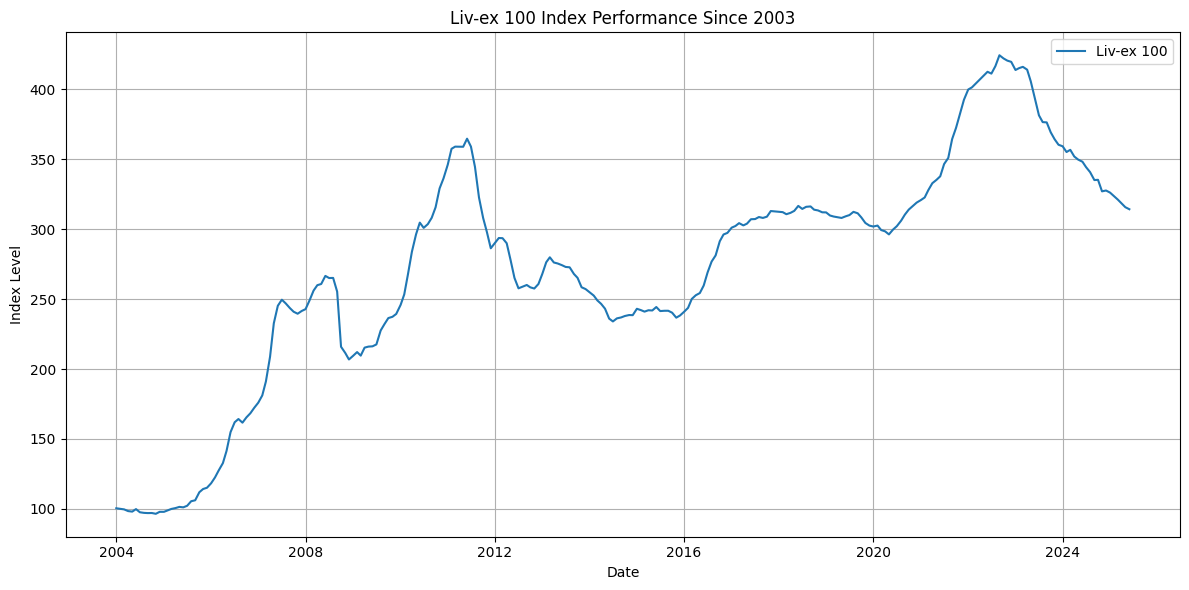


📈 Liv-ex 100 Performance:
Start Value: 100.41
End Value: 314.25
Total Return: 212.97%
CAGR: 5.47% per year


/tmp/ipython-input-23-1549777820.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


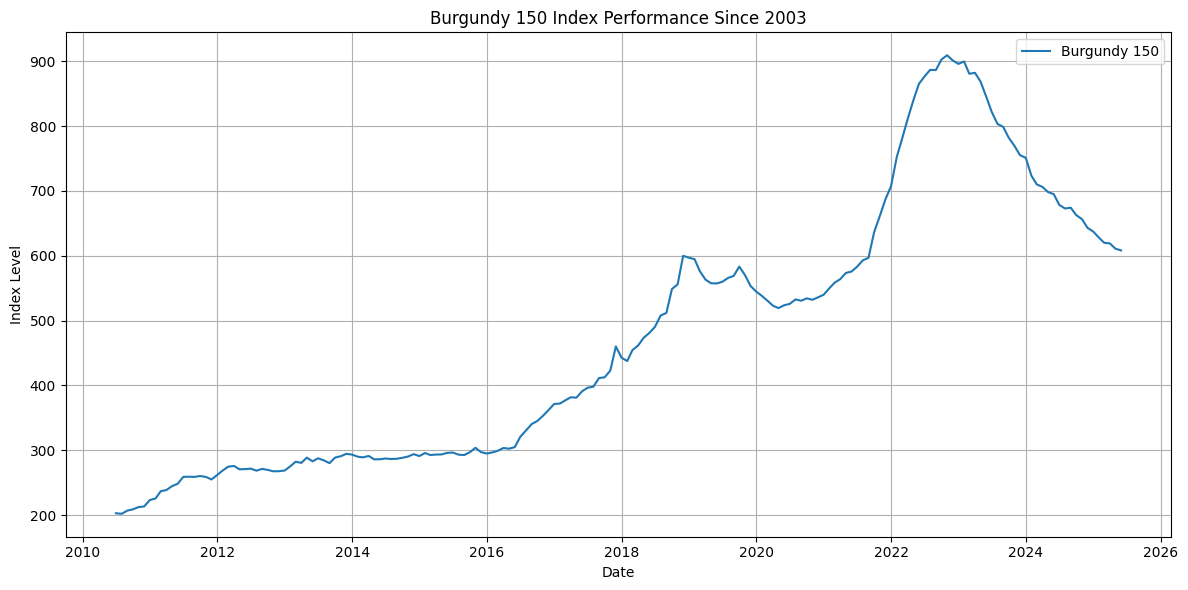


📈 Burgundy 150 Performance:
Start Value: 202.79
End Value: 608.27
Total Return: 199.95%
CAGR: 7.64% per year


/tmp/ipython-input-23-1549777820.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


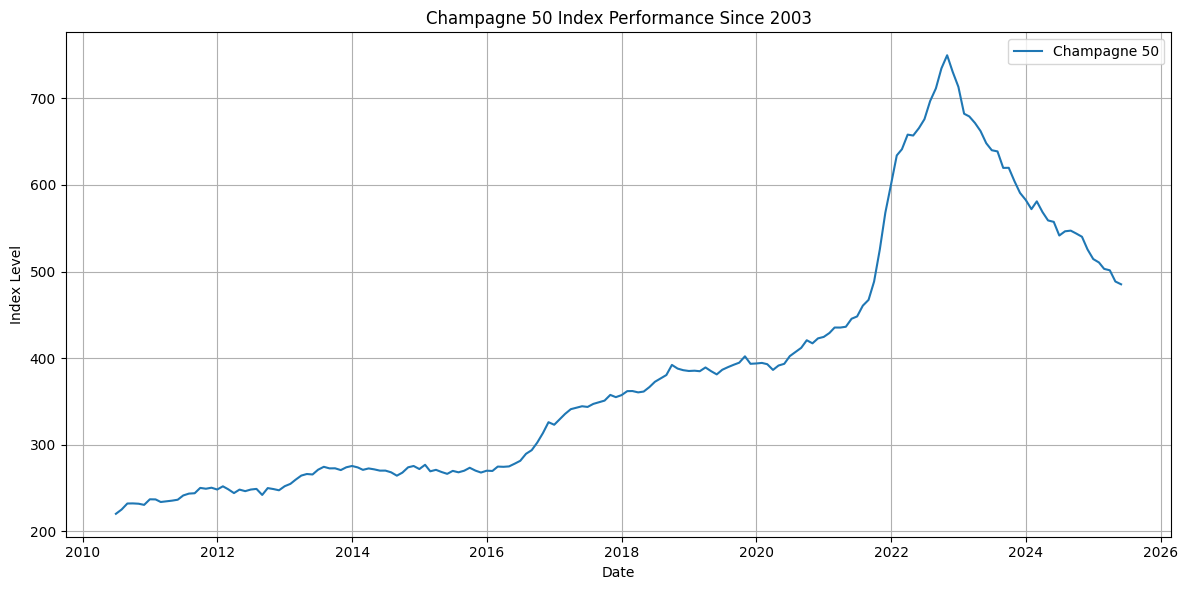


📈 Champagne 50 Performance:
Start Value: 220.33
End Value: 485.24
Total Return: 120.23%
CAGR: 5.43% per year


/tmp/ipython-input-23-1549777820.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


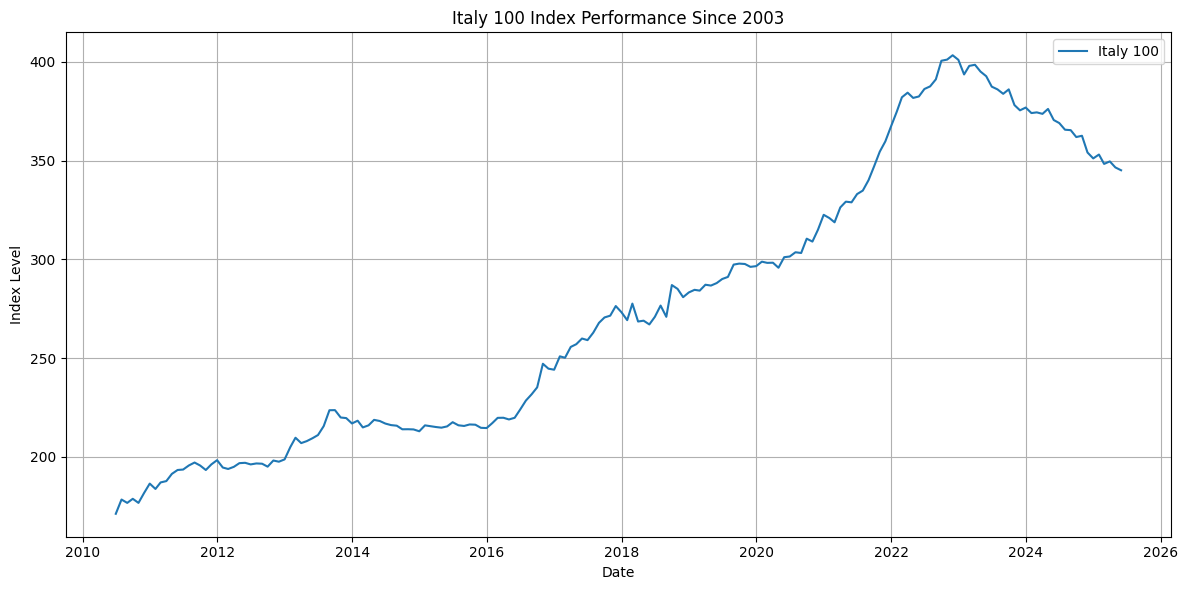


📈 Italy 100 Performance:
Start Value: 171.17
End Value: 345.08
Total Return: 101.60%
CAGR: 4.81% per year


/tmp/ipython-input-23-1549777820.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


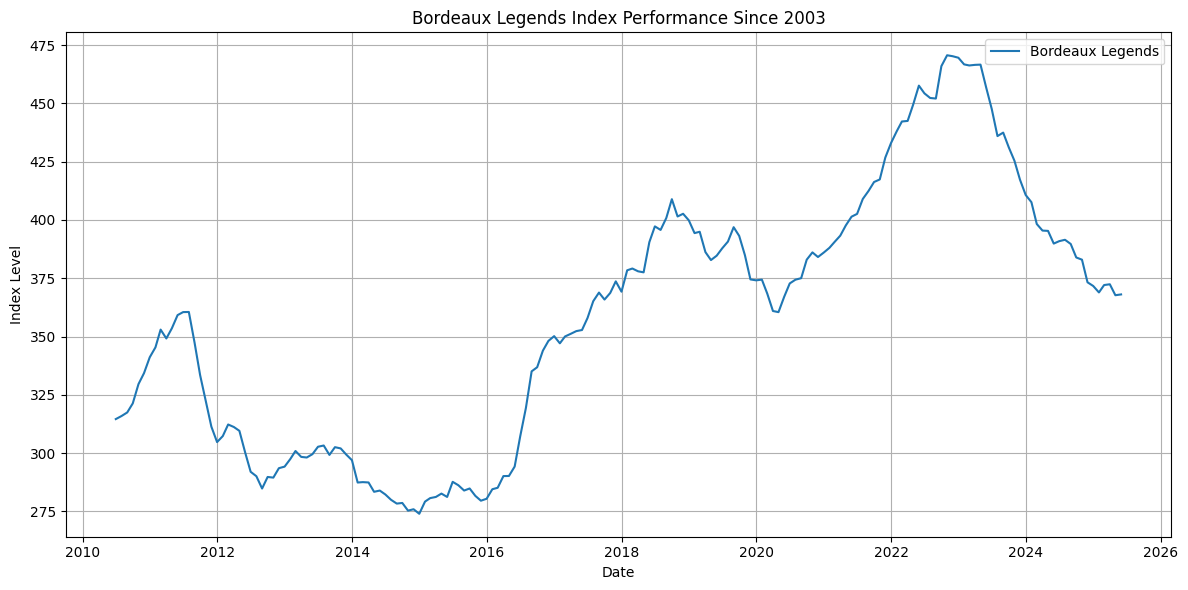


📈 Bordeaux Legends Performance:
Start Value: 314.57
End Value: 368.06
Total Return: 17.00%
CAGR: 1.06% per year

📊 Summary Table:
              Index  Start Date    End Date  Start Value  End Value  \
0        Liv-ex 100  2004-01-01  2025-05-31       100.41     314.25   
1      Burgundy 150  2010-06-30  2025-05-31       202.79     608.27   
2      Champagne 50  2010-06-30  2025-05-31       220.33     485.24   
3         Italy 100  2010-06-30  2025-05-31       171.17     345.08   
4  Bordeaux Legends  2010-06-30  2025-05-31       314.57     368.06   

   Total Return (%)  CAGR (%)  
0            212.97      5.47  
1            199.95      7.64  
2            120.23      5.43  
3            101.60      4.81  
4             17.00      1.06  

✅ Summary exported to: /content/drive/MyDrive/ML-Portfolio/data/livex_index_performance_summary.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Setup ===
base_path = '/content/drive/MyDrive/ML-Portfolio/data/'  # Adjust this path if needed

index_files = {
    'Liv-ex 100': 'Liv-ex 100.csv',
    'Burgundy 150': 'liv-ex Burgundy 150.csv',
    'Champagne 50': 'liv-ex Champagne 50.csv',
    'Italy 100': 'liv-ex Italy 100.csv',
    'Bordeaux Legends': 'liv-ex Bordeaux Legends.csv'
}

def calculate_cagr(start_val, end_val, years):
    return ((end_val / start_val) ** (1 / years) - 1) * 100

summary_data = []

# === Main Analysis Loop ===
for index_name, filename in index_files.items():
    file_path = os.path.join(base_path, filename)

    try:
        # Skip metadata row, use 2nd row as header, set Date as index
        df = pd.read_csv(file_path, skiprows=1, index_col=0)

        # Parse index as datetime
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')
        df = df[~df.index.isna()]  # Drop bad date rows

        # Filter from 2003 onward
        df = df[df.index >= pd.to_datetime('2003-01-01')]

        # Convert first column to numeric (assumes index values are in first column)
        series = pd.to_numeric(df.iloc[:, 0], errors='coerce').dropna()

        if series.empty:
            print(f"\n⚠️ No valid data for {index_name} after 2003.")
            continue

        # Performance calculation
        start_val = series.iloc[0]
        end_val = series.iloc[-1]
        years = (series.index[-1] - series.index[0]).days / 365.25
        total_return = ((end_val / start_val) - 1) * 100
        cagr = calculate_cagr(start_val, end_val, years)

        # Save results
        summary_data.append({
            'Index': index_name,
            'Start Date': series.index[0].strftime('%Y-%m-%d'),
            'End Date': series.index[-1].strftime('%Y-%m-%d'),
            'Start Value': round(start_val, 2),
            'End Value': round(end_val, 2),
            'Total Return (%)': round(total_return, 2),
            'CAGR (%)': round(cagr, 2)
        })

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(series, label=index_name)
        plt.title(f"{index_name} Index Performance Since 2003")
        plt.xlabel("Date")
        plt.ylabel("Index Level")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Console output
        print(f"\n📈 {index_name} Performance:")
        print(f"Start Value: {start_val:.2f}")
        print(f"End Value: {end_val:.2f}")
        print(f"Total Return: {total_return:.2f}%")
        print(f"CAGR: {cagr:.2f}% per year")

    except Exception as e:
        print(f"\n❌ Error processing {index_name}: {str(e)}")

# === Summary Output ===
summary_df = pd.DataFrame(summary_data)
print("\n📊 Summary Table:")
print(summary_df)

# === Optional: Save to CSV ===
output_path = os.path.join(base_path, 'livex_index_performance_summary.csv')
summary_df.to_csv(output_path, index=False)
print(f"\n✅ Summary exported to: {output_path}")


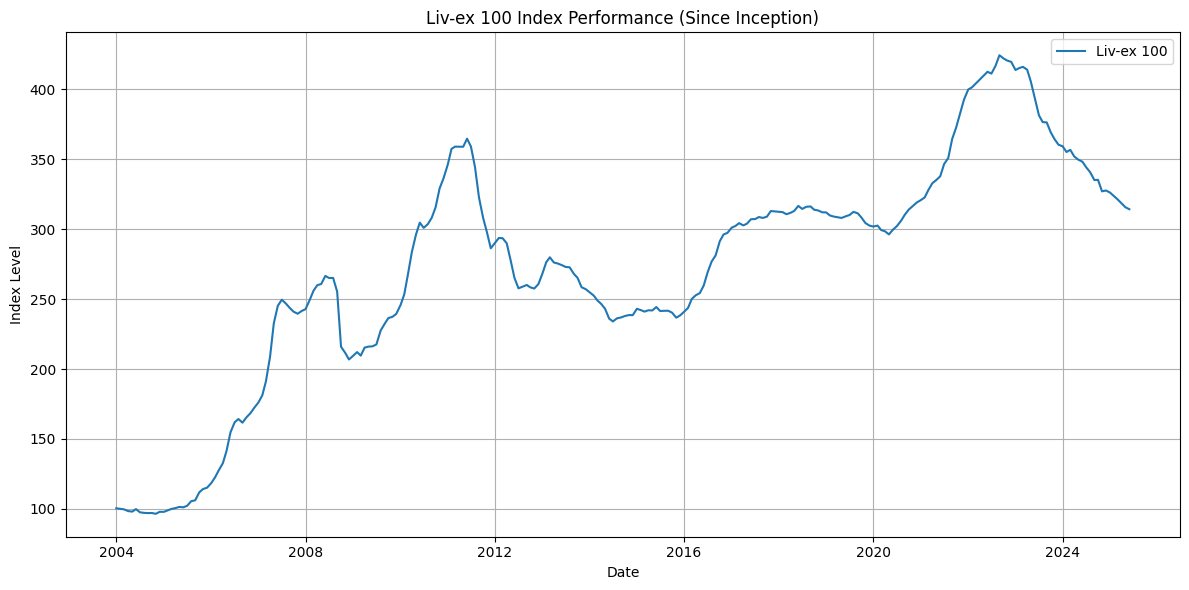


📊 Liv-ex 100 Summary:
- Since Inception: 212.97% (CAGR 5.47%)
- Since 2016: 30.46% (CAGR 2.87%)
- Since 2022 Peak: -25.95% (CAGR -10.36%)


/tmp/ipython-input-28-976087082.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


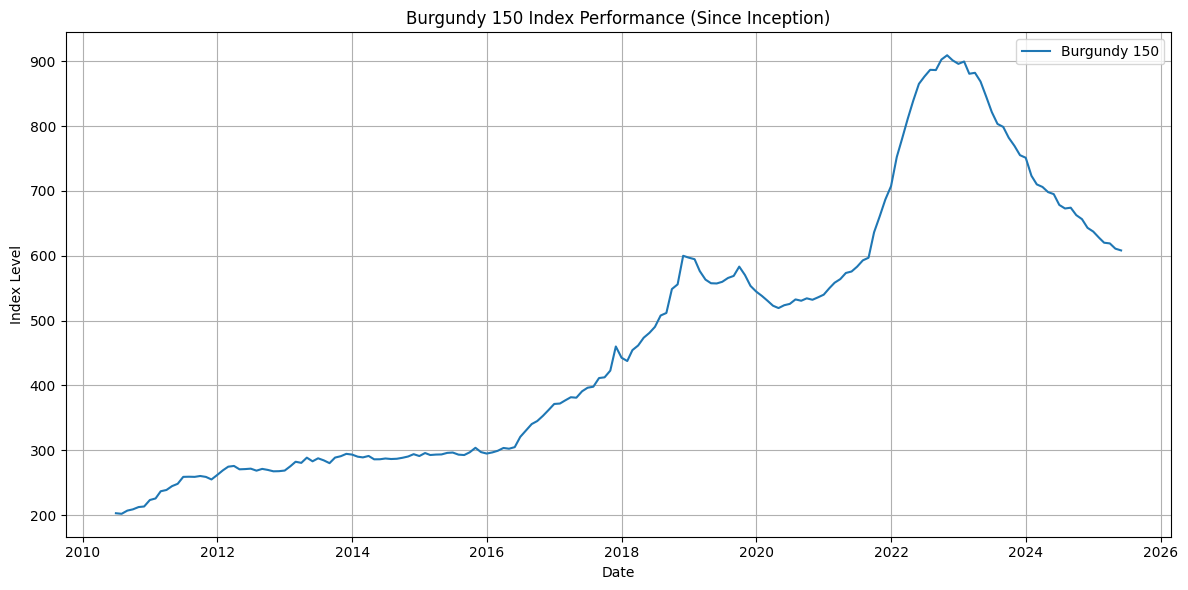


📊 Burgundy 150 Summary:
- Since Inception: 199.95% (CAGR 7.64%)
- Since 2016: 105.04% (CAGR 8.0%)
- Since 2022 Peak: -33.11% (CAGR -14.42%)


/tmp/ipython-input-28-976087082.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


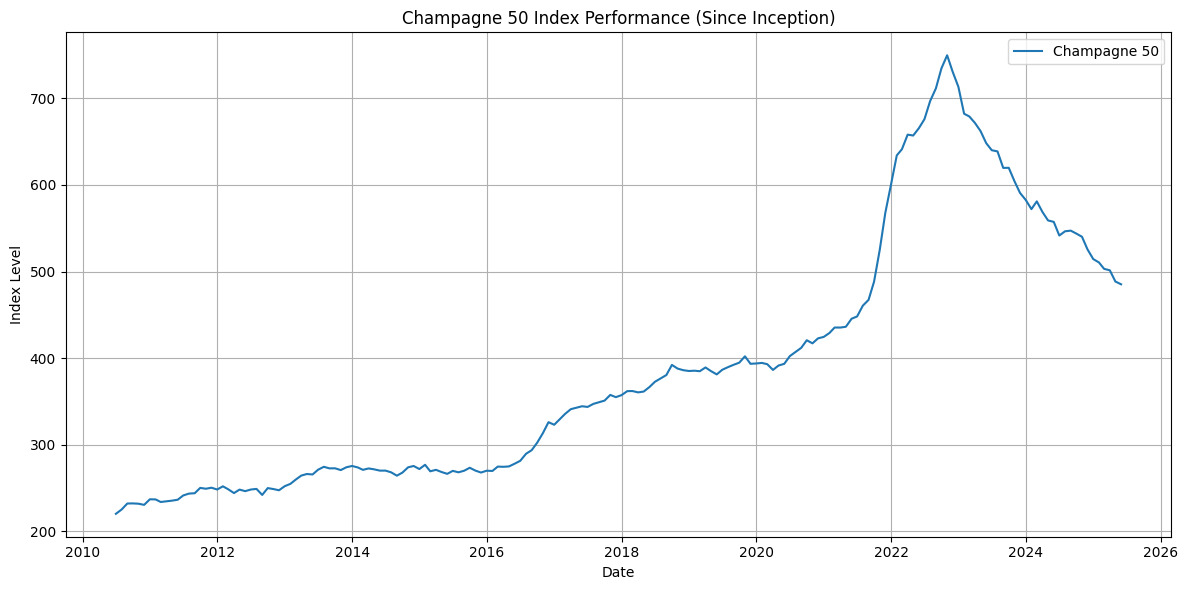


📊 Champagne 50 Summary:
- Since Inception: 120.23% (CAGR 5.43%)
- Since 2016: 79.87% (CAGR 6.49%)
- Since 2022 Peak: -35.27% (CAGR -15.5%)


/tmp/ipython-input-28-976087082.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


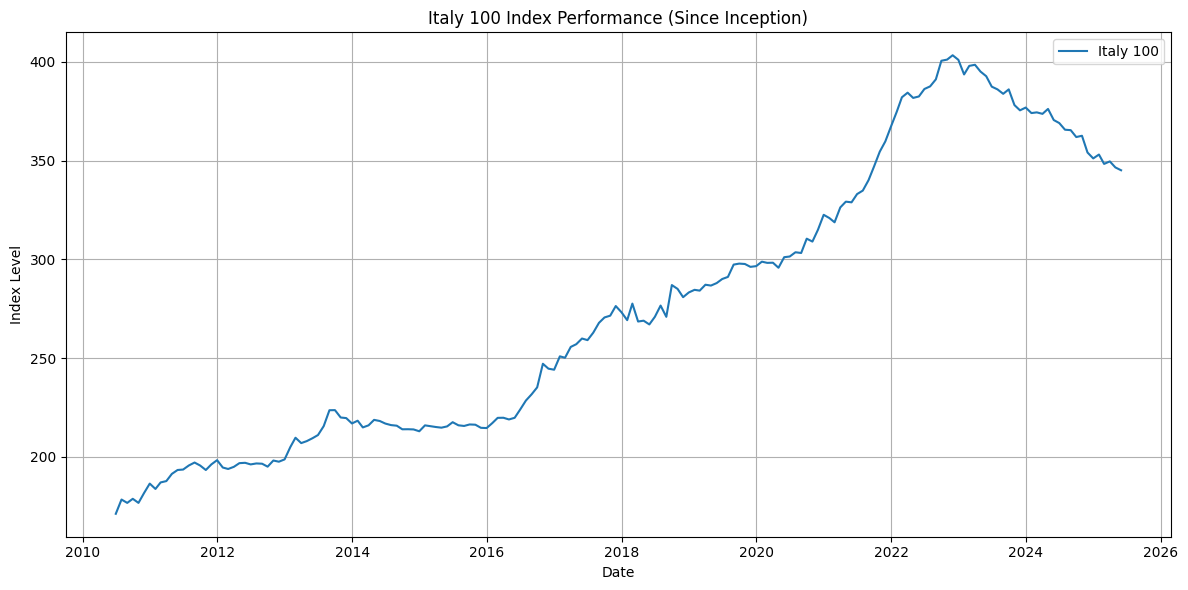


📊 Italy 100 Summary:
- Since Inception: 101.6% (CAGR 4.81%)
- Since 2016: 58.95% (CAGR 5.09%)
- Since 2022 Peak: -14.44% (CAGR -6.05%)


/tmp/ipython-input-28-976087082.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')


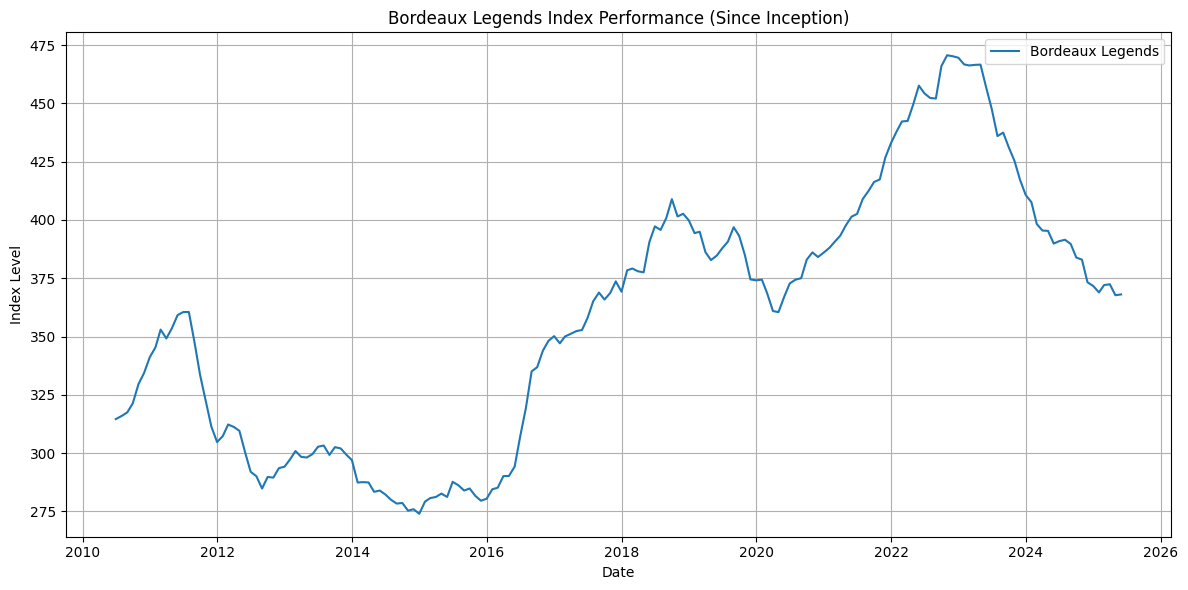


📊 Bordeaux Legends Summary:
- Since Inception: 17.0% (CAGR 1.06%)
- Since 2016: 29.38% (CAGR 2.8%)
- Since 2022 Peak: -21.8% (CAGR -9.09%)

✅ Final Summary Table:
              Index  Start Date    End Date  TR Since Inception (%)  \
0        Liv-ex 100  2004-01-01  2025-05-31                  212.97   
1      Burgundy 150  2010-06-30  2025-05-31                  199.95   
2      Champagne 50  2010-06-30  2025-05-31                  120.23   
3         Italy 100  2010-06-30  2025-05-31                  101.60   
4  Bordeaux Legends  2010-06-30  2025-05-31                   17.00   

   CAGR Since Inception (%)  TR Since 2016 (%)  CAGR Since 2016 (%)  \
0                      5.47              30.46                 2.87   
1                      7.64             105.04                 8.00   
2                      5.43              79.87                 6.49   
3                      4.81              58.95                 5.09   
4                      1.06              29.38        

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# === Setup ===
base_path = '/content/drive/MyDrive/ML-Portfolio/data/'

index_files = {
    'Liv-ex 100': 'Liv-ex 100.csv',
    'Burgundy 150': 'liv-ex Burgundy 150.csv',
    'Champagne 50': 'liv-ex Champagne 50.csv',
    'Italy 100': 'liv-ex Italy 100.csv',
    'Bordeaux Legends': 'liv-ex Bordeaux Legends.csv'
}

def calculate_cagr(start_val, end_val, years):
    if years <= 0 or start_val <= 0 or end_val <= 0:
        return None
    return ((end_val / start_val) ** (1 / years) - 1) * 100

summary_data = []

for index_name, filename in index_files.items():
    file_path = os.path.join(base_path, filename)

    try:
        # Load data
        df = pd.read_csv(file_path, skiprows=1, index_col=0)
        df.index = pd.to_datetime(df.index, dayfirst=True, errors='coerce')
        df = df[~df.index.isna()]
        df = df.sort_index()
        series = pd.to_numeric(df.iloc[:, 0], errors='coerce').dropna()

        if series.empty:
            print(f"\n⚠️ No valid data for {index_name}.")
            continue

        record = {'Index': index_name}
        first_date = series.index[0]
        last_date = series.index[-1]
        record['Start Date'] = first_date.strftime('%Y-%m-%d')
        record['End Date'] = last_date.strftime('%Y-%m-%d')

        # === 1. Performance since inception
        start_val = series.iloc[0]
        end_val = series.iloc[-1]
        years = (last_date - first_date).days / 365.25
        tr = ((end_val / start_val) - 1) * 100
        cagr = calculate_cagr(start_val, end_val, years)
        record['TR Since Inception (%)'] = round(tr, 2)
        record['CAGR Since Inception (%)'] = round(cagr, 2)

        # === 2. Performance since 2016
        if series.index.min() <= pd.to_datetime('2016-01-01'):
            data_2016 = series[series.index >= '2016-01-01']
            start_2016 = data_2016.iloc[0]
            end_2016 = data_2016.iloc[-1]
            years_2016 = (data_2016.index[-1] - data_2016.index[0]).days / 365.25
            tr_2016 = ((end_2016 / start_2016) - 1) * 100
            cagr_2016 = calculate_cagr(start_2016, end_2016, years_2016)
            record['TR Since 2016 (%)'] = round(tr_2016, 2)
            record['CAGR Since 2016 (%)'] = round(cagr_2016, 2)
        else:
            record['TR Since 2016 (%)'] = 'N/A'
            record['CAGR Since 2016 (%)'] = 'N/A'

        # === 3. From 2022 peak to now
        peak_data = series[(series.index >= '2022-01-01') & (series.index <= '2022-12-31')]
        if not peak_data.empty:
            peak_val = peak_data.max()
            peak_date = peak_data.idxmax()
            years_from_peak = (last_date - peak_date).days / 365.25
            tr_peak = ((series.iloc[-1] / peak_val) - 1) * 100
            cagr_peak = calculate_cagr(peak_val, series.iloc[-1], years_from_peak)
            record['2022 Peak Date'] = peak_date.strftime('%Y-%m-%d')
            record['TR Since 2022 Peak (%)'] = round(tr_peak, 2)
            record['CAGR Since 2022 Peak (%)'] = round(cagr_peak, 2)
        else:
            record['TR Since 2022 Peak (%)'] = 'N/A'
            record['CAGR Since 2022 Peak (%)'] = 'N/A'

        # Save
        summary_data.append(record)

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(series, label=index_name)
        plt.title(f"{index_name} Index Performance (Since Inception)")
        plt.xlabel("Date")
        plt.ylabel("Index Level")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        print(f"\n📊 {index_name} Summary:")
        print(f"- Since Inception: {record['TR Since Inception (%)']}% (CAGR {record['CAGR Since Inception (%)']}%)")
        print(f"- Since 2016: {record['TR Since 2016 (%)']}% (CAGR {record['CAGR Since 2016 (%)']}%)")
        print(f"- Since 2022 Peak: {record['TR Since 2022 Peak (%)']}% (CAGR {record['CAGR Since 2022 Peak (%)']}%)")

    except Exception as e:
        print(f"\n❌ Error processing {index_name}: {str(e)}")

# === Output table
summary_df = pd.DataFrame(summary_data)
print("\n✅ Final Summary Table:")
print(summary_df)

# === Save CSV
output_path = os.path.join(base_path, 'livex_returns_summary.csv')
summary_df.to_csv(output_path, index=False)
print(f"\n📁 Summary saved to: {output_path}")
